In [10]:
import numpy as np           # A functional library for working on arrays
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#Generating 30000 Random Data

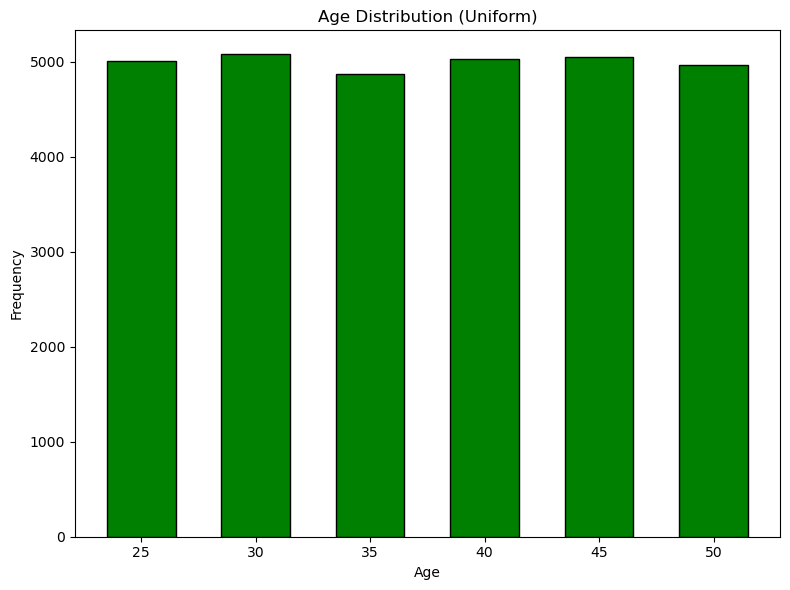

In [24]:
np.random.seed(42)                 # A fixed value for the seed function to generate the same selection of random numbers each time it is run

n_samples = 30000                  # Population

ages = [25, 30, 35, 40, 45, 50]     # an array of ages which we want to survey their possibilities

age_data = np.random.choice(ages, size=n_samples) # Selection of 30,000 samples at random as uniformly distributed, each value of which 
                                                   #is selected from the age array.

age_counts = {age: np.sum(age_data == age) for age in ages} #Counts the number of times each age appears in random data


plt.figure(figsize=(8, 6))     # adjustting the chart frame
plt.bar(age_counts.keys(), age_counts.values(), color='green', edgecolor='black', width=3)# Drawing the bar chart
plt.title('Age Distribution (Uniform)') 
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(ages)  # Inserting a label on the axle x

plt.tight_layout() # Adjustting the bar's distance
plt.show()

In [ ]:
# Calculating Weighing Possibilities

In [28]:

purchase_probs = {25: 0.10, 30: 0.20, 35: 0.30, 40: 0.40, 45: 0.50, 50: 0.60} #Allocation of purchase possibility based on individuals's age

purchases = [np.random.rand() < purchase_probs[age] for age in age_data] # Create an array of True or False to Determining whether the person made 
                                                                          #a purchase or not
df = pd.DataFrame({'Age': age_data, 'Purchased': purchases}) # convert an array of true/false value to a DataFrame
df


,Age,Purchased
0,40,True
1,45,False
2,35,False
3,45,True
4,45,False
...,...,...
29995,40,False
29996,30,True
29997,50,False
29998,45,False


In [30]:
#Calculating the weighting conditional possidictionarybility 

  The age: 25
  - P(B) for 25 years old: 0.1670
  - P(A | B) for 25 years old: 0.0990
  - P(A ∩ B) for 25 years old: 0.0165

  The age: 30
  - P(B) for 30 years old: 0.1692
  - P(A | B) for 30 years old: 0.1948
  - P(A ∩ B) for 30 years old: 0.0330

  The age: 35
  - P(B) for 35 years old: 0.1624
  - P(A | B) for 35 years old: 0.2945
  - P(A ∩ B) for 35 years old: 0.0478

  The age: 40
  - P(B) for 40 years old: 0.1676
  - P(A | B) for 40 years old: 0.3936
  - P(A ∩ B) for 40 years old: 0.0660

  The age: 45
  - P(B) for 45 years old: 0.1681
  - P(A | B) for 45 years old: 0.4939
  - P(A ∩ B) for 45 years old: 0.0830

  The age: 50
  - P(B) for 50 years old: 0.1657
  - P(A | B) for 50 years old: 0.5926
  - P(A ∩ B) for 50 years old: 0.0982



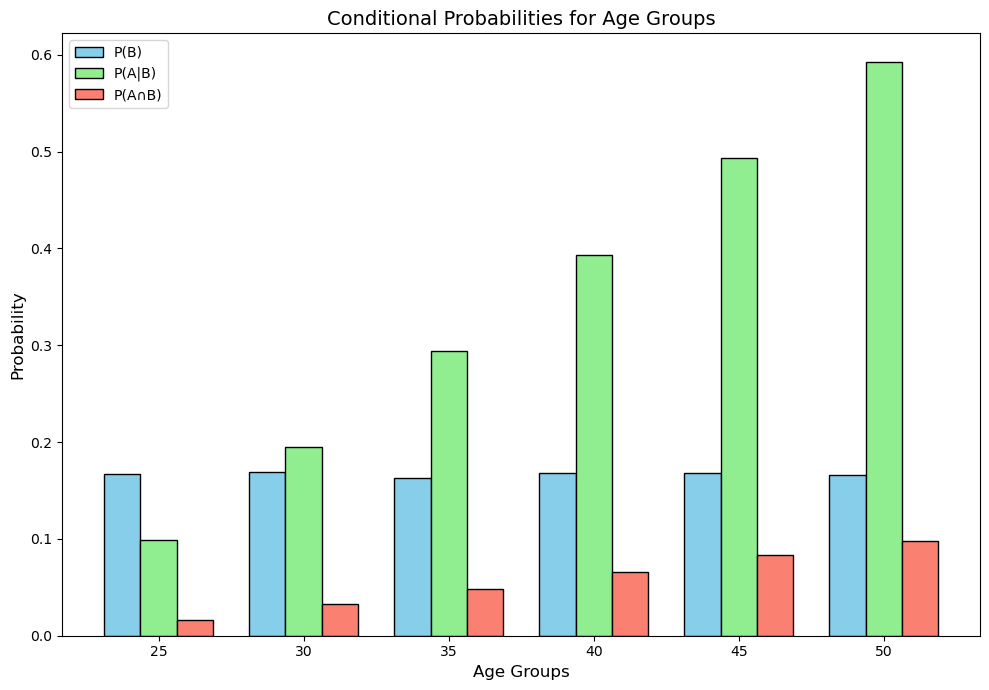

In [64]:

conditional_probs = {}   # Define dictionary to store probabilities
# Define lists to store values for plotting
p_B_list = []
p_A_given_B_list = []
p_occu_list = []

for age in ages:    # Exploring in ages for calculating their probalities
    df_age = df[df["Age"] == age]  # Filter data for each specific age range
        p_B = len(df_age) / n_samples              # Probability of occurrence P(B)
    p_A_given_B = df_age["Purchased"].mean()   # P(A | B)
    p_occu = p_B * p_A_given_B                 # P(A ∩ B) = P(A | B) * P(B)

    conditional_probs[age] = {"P(B)": p_B, "P(A|B)": p_A_given_B, "P(A∩B)": p_occu}  # saving in dictionary

    # Store values in lists for plotting
    p_B_list.append(p_B)
    p_A_given_B_list.append(p_A_given_B)
    p_occu_list.append(p_occu)
     # REPORTS
    print(f"  The age: {age}")
    print(f"  - P(B) for {age} years old: {p_B:.4f}")
    print(f"  - P(A | B) for {age} years old: {p_A_given_B:.4f}") 
    print(f"  - P(A ∩ B) for {age} years old: {p_occu:.4f}\n")

# Set up the positions for each group of bars
x = np.arange(len(ages))  # Number of groups
width = 0.25  # Width of the bars
fig, ax = plt.subplots(figsize=(10, 7)) # Adjusting frame size for chart
# Create bars for each probability
ax.bar(x - width, p_B_list, width, label='P(B)', color='skyblue', edgecolor='black')
ax.bar(x, p_A_given_B_list, width, label='P(A|B)', color='lightgreen', edgecolor='black')
ax.bar(x + width, p_occu_list, width, label='P(A∩B)', color='salmon', edgecolor='black')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Age Groups', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title('Conditional Probabilities for Age Groups', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(ages)
ax.legend()

# Show the plot
fig.tight_layout()
plt.show()


In [15]:
#Calculating the unweighting conditional possidictionarybility 

  The age: 25 years old
  - P(B) for 25 years old: 0.1667
  - P(A | B) for 25 years old: 0.3500
  - P(A ∩ B) for 25 years old: 0.0583

  The age: 30 years old
  - P(B) for 30 years old: 0.1667
  - P(A | B) for 30 years old: 0.3000
  - P(A ∩ B) for 30 years old: 0.0500

  The age: 35 years old
  - P(B) for 35 years old: 0.1667
  - P(A | B) for 35 years old: 0.4500
  - P(A ∩ B) for 35 years old: 0.0750

  The age: 40 years old
  - P(B) for 40 years old: 0.1667
  - P(A | B) for 40 years old: 0.6000
  - P(A ∩ B) for 40 years old: 0.1000

  The age: 45 years old
  - P(B) for 45 years old: 0.1667
  - P(A | B) for 45 years old: 0.2000
  - P(A ∩ B) for 45 years old: 0.0333

  The age: 50 years old
  - P(B) for 50 years old: 0.1667
  - P(A | B) for 50 years old: 0.1000
  - P(A ∩ B) for 50 years old: 0.0167



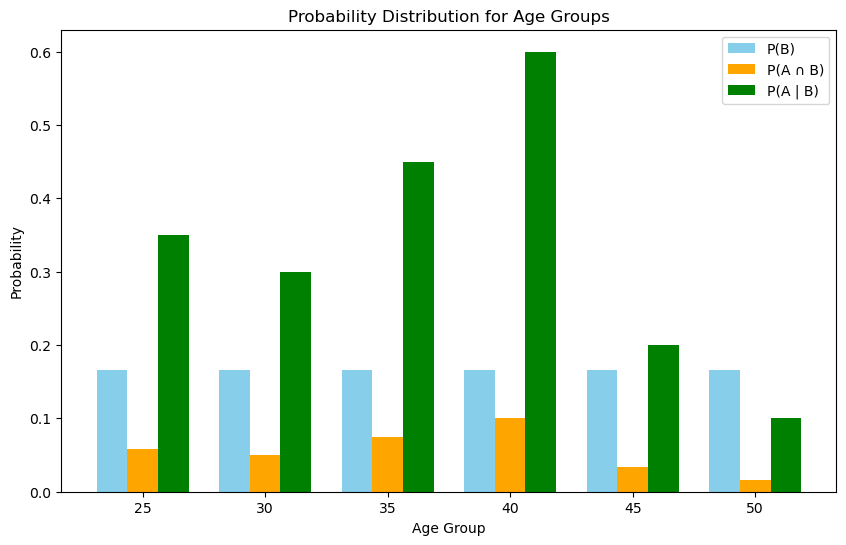

In [82]:

total_population = 30000 # population 
group_population = 5000 #population of each sample


age_groups = {    # purchase probability for each age group
    "25": 0.35,
    "30": 0.30,
    "35": 0.45,
    "40": 0.60,
    "45": 0.20,
    "50": 0.10
}

ages = list(age_groups.keys())  # Access to ages
p_b = [group_population / total_population] * len(ages)  # P(B) 
p_a_given_b = list(age_groups.values())  # P(A | B)
p_a_and_b = [p_b[i] * p_a_given_b[i] for i in range(len(ages))]  # P(A ∩ B) = P(B) * P(A|B)

# Report
for i in range(len(ages)):
    print(f"  The age: {ages[i]} years old")
    print(f"  - P(B) for {ages[i]} years old: {p_b[i]:.4f}")
    print(f"  - P(A | B) for {ages[i]} years old: {p_a_given_b[i]:.4f}") 
    print(f"  - P(A ∩ B) for {ages[i]} years old: {p_a_and_b[i]:.4f}\n")


x = np.arange(len(ages))  # setting the bar locationا
width = 0.25  # setting the bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width, p_b, width=width, label="P(B)", color="skyblue") # Drawing the P(B) bar
plt.bar(x, p_a_and_b, width=width, label="P(A ∩ B)", color="orange") # Drawing the P(A,B) bar
plt.bar(x + width, p_a_given_b, width=width, label="P(A | B)", color="green") # Drawing the P(A|B) bar

# تنظیمات نمودار
plt.xlabel("Age Group") # x axe lable
plt.ylabel("Probability")# y axe lable
plt.title("Probability Distribution for Age Groups")
plt.xticks(x, ages) 
plt.legend()
plt.show()
